# 标准的pytorch工作流程

使用pytorch进行数据建模以及预测的标准流程如下：
<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" width=900 alt="a pytorch workflow flowchat"/>

## 处理数据

在建立所有的模型之前，首先要做的就是处理数据。
在处理完数据之后就是选取合适的模型进行特征提取。

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png">

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# set parameters
weight = 0.7
bias = 0.3

# create data for use
X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

# split data into training and test sets,with no innersection
train_split = int(0.8 * len(X)) # 80% of data will be used for training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# Check whether the data has been separated correctly.
len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

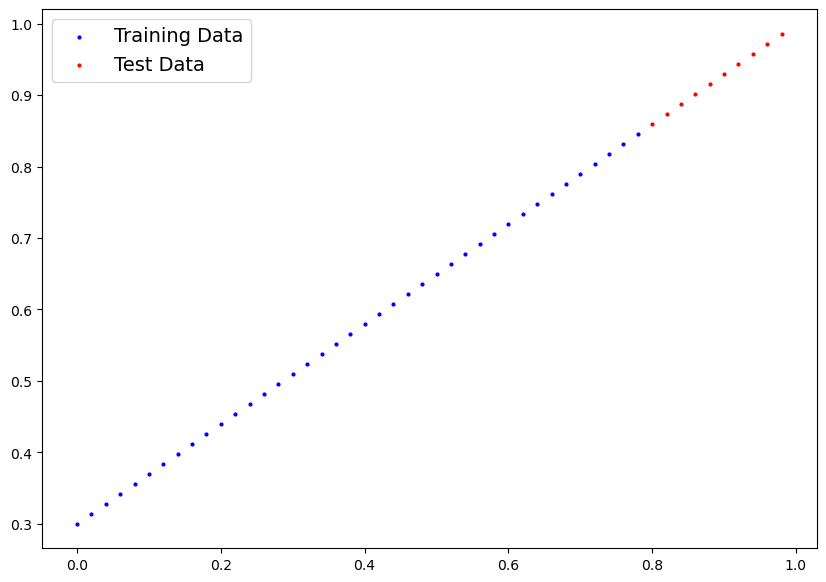

In [16]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     prediciotns = None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # plot training data-scatter,blue
    plt.scatter(train_data,train_labels,c='b',s=4,label='Training Data')

    # plot test data-scatter,red
    plt.scatter(test_data,test_labels,c='r',s=4,label='Test Data')

    if prediciotns is not None:
        plt.scatter(test_data,prediciotns,c='g',s=4,label='Predictions')
    
    # Show the legend
    plt.legend(prop={"size": 14});

plot_predictions()
    

## 构建模型

In [11]:
## 构建模型

import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 将初始的参数都设置为随机的，后面会反向传播更新这个数值
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float),  # 修正: 使用nn.Parameter而非nn.parameter
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1, dtype=torch.float),    # 修正: 使用nn.Parameter而非nn.parameter
                                 requires_grad=True)
    
    # 算法的前向计算过程，pytorch会自动反向传播求梯度
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # 修正: 将torch.tensor改为torch.Tensor
        return self.weights * x + self.bias


In [13]:
torch.manual_seed(42) # set random seed

# 创建模型的实例，可以查看模型的参数
model_0 = LinearRegressionModel()
list(model_0.parameters())

# 同时可以使用字典的形式查看参数
model_0.state_dict()


OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [14]:
# 进行预测，建议使用新方法，效率更高

# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])


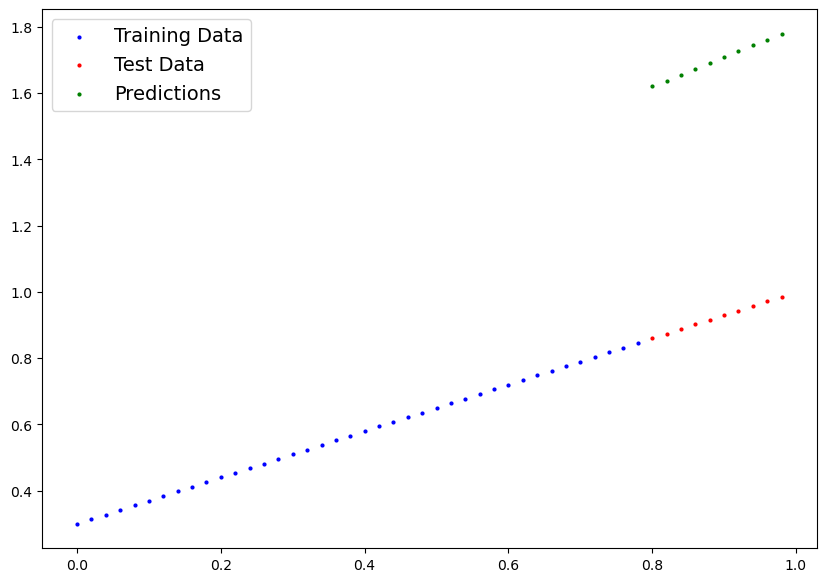

In [17]:
# 查看没有经过训练的预测值是什么样的
plot_predictions(prediciotns=y_preds)

## 训练模型

In [18]:
# 损失函数是计算最后预测的结果与实际值之间的差距
# 优化器是在模型反向传播时用的

loss_fn = nn.L1Loss()

optermizer = torch.optim.SGD(params=model_0.parameters(),# 指定要梯度下降的参数
                             lr=1e-2) # 指定学习率，决定步幅

In [19]:
# 训练流程： forward pass -> calculate the loss-> op zero gradients -> back propagation -> update op
# 测试流程 forward pass -> calculate the loss

# the number of epochs
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    # training

    model_0.train()

    # step 1. forward pass
    y_pred = model_0(X_train)

    # step 2. calculate the loss
    loss = loss_fn(y_pred,y_train)

    # step 3. op zero grad
    optermizer.zero_grad()

    # step 4. loss baackwards
    loss.backward()

    #step 5. progress the op
    optermizer.step()

    # Test
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred,y_test)

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.6860889196395874 | MAE Test Loss: 0.7637526988983154 
Epoch: 10 | MAE Train Loss: 0.5708791017532349 | MAE Test Loss: 0.6290428042411804 
Epoch: 20 | MAE Train Loss: 0.45566922426223755 | MAE Test Loss: 0.4943329691886902 
Epoch: 30 | MAE Train Loss: 0.34045934677124023 | MAE Test Loss: 0.35962313413619995 
Epoch: 40 | MAE Train Loss: 0.2252494841814041 | MAE Test Loss: 0.2249133139848709 
Epoch: 50 | MAE Train Loss: 0.1100396141409874 | MAE Test Loss: 0.09020347893238068 
Epoch: 60 | MAE Train Loss: 0.009724985808134079 | MAE Test Loss: 0.020998019725084305 
Epoch: 70 | MAE Train Loss: 0.006216754671186209 | MAE Test Loss: 0.014099234715104103 
Epoch: 80 | MAE Train Loss: 0.002788322512060404 | MAE Test Loss: 0.005826681852340698 
Epoch: 90 | MAE Train Loss: 0.007095950655639172 | MAE Test Loss: 0.00754010071977973 


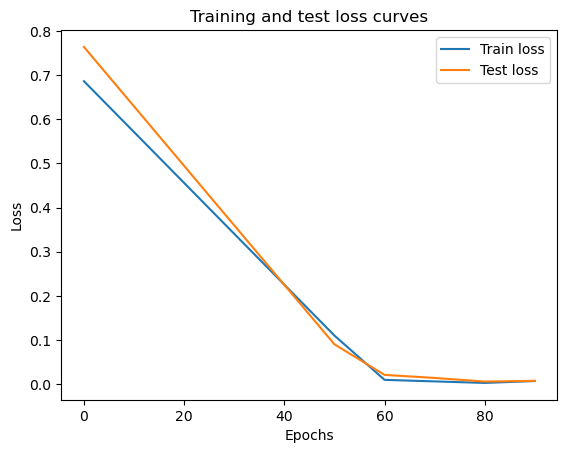

In [20]:
# Plot the loss curves--训练与测试过程可视化
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


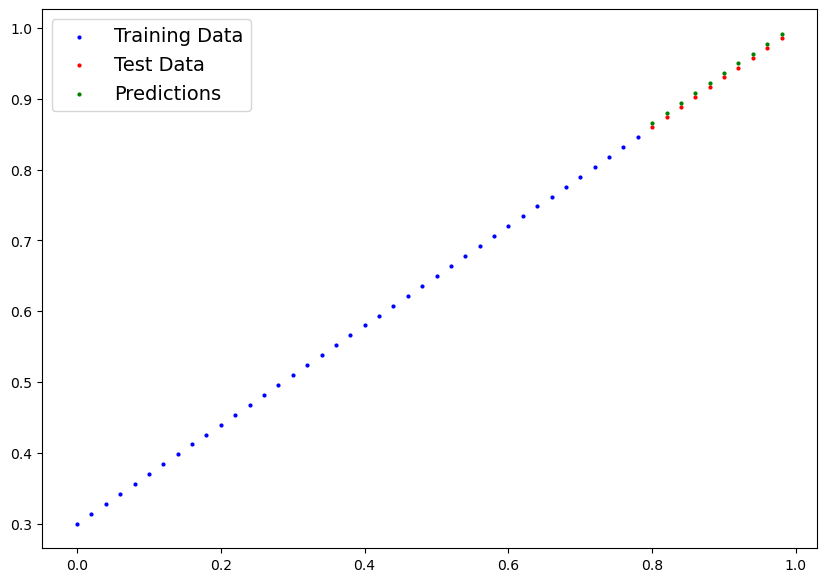

In [22]:
# 检查模型预测的效果
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)

plot_predictions(prediciotns=y_preds)

## 保存与加载模型


In [23]:
# 保存模型的参数字典
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models\01_pytorch_workflow_model_0.pth


In [24]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

'ls' �����ڲ����ⲿ���Ҳ���ǿ����еĳ���
���������ļ���


In [25]:
# 加载参数字典
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
# 完整代码
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

# split data 
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

# bulid model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    
    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model_1 = LinearRegressionModel()
model_1.to(device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

epoch = 1000
loss_fn = nn.L1Loss()
op = torch.optim.SGD(params=model_1.parameters(),lr=0.01)
for epoch in range(epoch):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred,y_train)

    op.zero_grad()

    loss.backward()

    op.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred,y_test)
    
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.9628264307975769 | MAE Test Loss: 0.858583927154541 
Epoch: 100 | MAE Train Loss: 0.0938224196434021 | MAE Test Loss: 0.1965152472257614 
Epoch: 200 | MAE Train Loss: 0.05850548669695854 | MAE Test Loss: 0.13585351407527924 
Epoch: 300 | MAE Train Loss: 0.02416440099477768 | MAE Test Loss: 0.05587625503540039 
Epoch: 400 | MAE Train Loss: 0.007047383580356836 | MAE Test Loss: 0.007811039686203003 
Epoch: 500 | MAE Train Loss: 0.007047383580356836 | MAE Test Loss: 0.007811039686203003 
Epoch: 600 | MAE Train Loss: 0.007047383580356836 | MAE Test Loss: 0.007811039686203003 
Epoch: 700 | MAE Train Loss: 0.007047383580356836 | MAE Test Loss: 0.007811039686203003 
Epoch: 800 | MAE Train Loss: 0.007047383580356836 | MAE Test Loss: 0.007811039686203003 
Epoch: 900 | MAE Train Loss: 0.007047383580356836 | MAE Test Loss: 0.007811039686203003 


In [30]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7028]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2919], device='cuda:0'))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


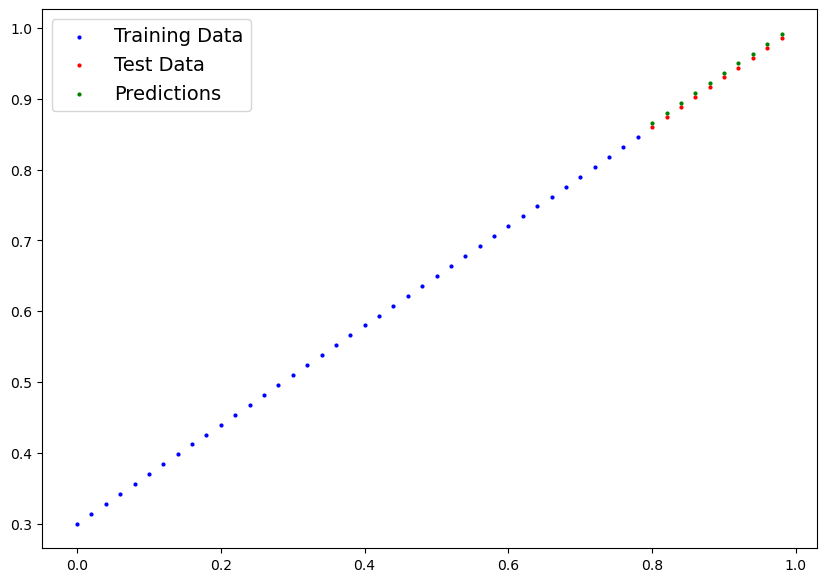

In [32]:
# plot_predictions(predictions=y_preds) # -> won't work... data not on CPU

# Put data on the CPU and plot it
plot_predictions(prediciotns=y_preds.cpu())

In [33]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: models\01_pytorch_workflow_model_1.pth


In [35]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0
